<a href="https://colab.research.google.com/github/vineetyadav/kaggle_experiment/blob/main/BirdClef.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.6

Found existing installation: kaggle 1.5.6
Uninstalling kaggle-1.5.6:
  Successfully uninstalled kaggle-1.5.6
  Using cached kaggle-1.5.6-py3-none-any.whl


In [ ]:
!pip install kaggle
!pip install --upgrade --force-reinstall --no-deps kaggle?

Object `kaggle` not found.


In [ ]:
!kaggle competitions download -c birdclef-2022

100% 6.10G/6.12G [00:46<00:00, 173MB/s]
100% 6.12G/6.12G [00:46<00:00, 142MB/s]


In [ ]:
!unzip birdclef-2022.zip

Streaming output truncated to the last 5000 lines.
  inflating: train_audio/normoc/XC608251.ogg  
  inflating: train_audio/normoc/XC608252.ogg  
  inflating: train_audio/normoc/XC608253.ogg  
  inflating: train_audio/normoc/XC608254.ogg  
  inflating: train_audio/normoc/XC608255.ogg  
  inflating: train_audio/normoc/XC608256.ogg  
  inflating: train_audio/normoc/XC608257.ogg  
  inflating: train_audio/normoc/XC608258.ogg  
  inflating: train_audio/normoc/XC608259.ogg  
  inflating: train_audio/normoc/XC608447.ogg  
  inflating: train_audio/normoc/XC608450.ogg  
  inflating: train_audio/normoc/XC608452.ogg  
  inflating: train_audio/normoc/XC608453.ogg  
  inflating: train_audio/normoc/XC608485.ogg  
  inflating: train_audio/normoc/XC608486.ogg  
  inflating: train_audio/normoc/XC608487.ogg  
  inflating: train_audio/normoc/XC608489.ogg  
  inflating: train_audio/normoc/XC608496.ogg  
  inflating: train_audio/normoc/XC610095.ogg  
  inflating: train_audio/normoc/XC616859.ogg  
  inflati

In [ ]:
import pandas as pd
import os
import librosa
import librosa.display
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt

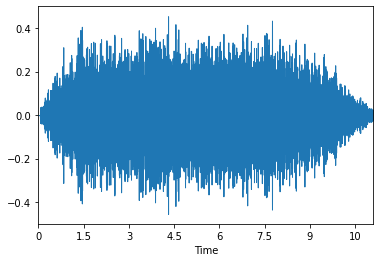

In [ ]:
file_name='/content/train_audio/afrsil1/XC125458.ogg'

audio_data, sampling_rate = librosa.load(file_name)
librosa.display.waveplot(audio_data,sr=sampling_rate)
ipd.Audio(file_name)

In [ ]:
audio_data

array([-8.6681177e-07,  5.7886984e-07, -2.3340552e-05, ...,
       -1.7199574e-04, -1.1852684e-05,  0.0000000e+00], dtype=float32)

In [ ]:
len(audio_data)

244800

In [ ]:
sampling_rate

22050

In [ ]:
import json 
json_file = open("scored_birds.json","r")
scored_bird = json.load(json_file)
scored_bird

['akiapo',
 'aniani',
 'apapan',
 'barpet',
 'crehon',
 'elepai',
 'ercfra',
 'hawama',
 'hawcre',
 'hawgoo',
 'hawhaw',
 'hawpet1',
 'houfin',
 'iiwi',
 'jabwar',
 'maupar',
 'omao',
 'puaioh',
 'skylar',
 'warwhe1',
 'yefcan']

In [ ]:
data = pd.read_csv("train_metadata.csv")
data.head()

,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,license,rating,time,url,filename
0,afrsil1,[],"['call', 'flight call']",12.3910,-1.4930,Euodice cantans,African Silverbill,Bram Piot,Creative Commons Attribution-NonCommercial-Sha...,2.5,08:00,https://www.xeno-canto.org/125458,afrsil1/XC125458.ogg
1,afrsil1,"['houspa', 'redava', 'zebdov']",['call'],19.8801,-155.7254,Euodice cantans,African Silverbill,Dan Lane,Creative Commons Attribution-NonCommercial-Sha...,3.5,08:30,https://www.xeno-canto.org/175522,afrsil1/XC175522.ogg
2,afrsil1,[],"['call', 'song']",16.2901,-16.0321,Euodice cantans,African Silverbill,Bram Piot,Creative Commons Attribution-NonCommercial-Sha...,4.0,11:30,https://www.xeno-canto.org/177993,afrsil1/XC177993.ogg
3,afrsil1,[],"['alarm call', 'call']",17.0922,54.2958,Euodice cantans,African Silverbill,Oscar Campbell,Creative Commons Attribution-NonCommercial-Sha...,4.0,11:00,https://www.xeno-canto.org/205893,afrsil1/XC205893.ogg
4,afrsil1,[],['flight call'],21.4581,-157.7252,Euodice cantans,African Silverbill,Ross Gallardy,Creative Commons Attribution-NonCommercial-Sha...,3.0,16:30,https://www.xeno-canto.org/207431,afrsil1/XC207431.ogg


In [ ]:
bird_taxonomy = pd.read_csv("/content/eBird_Taxonomy_v2021.csv")
bird_taxonomy.head()

,TAXON_ORDER,CATEGORY,SPECIES_CODE,PRIMARY_COM_NAME,SCI_NAME,ORDER1,FAMILY,SPECIES_GROUP,REPORT_AS
0,1,species,ostric2,Common Ostrich,Struthio camelus,Struthioniformes,Struthionidae (Ostriches),Ostriches,NaN
1,6,species,ostric3,Somali Ostrich,Struthio molybdophanes,Struthioniformes,Struthionidae (Ostriches),NaN,NaN
2,7,slash,y00934,Common/Somali Ostrich,Struthio camelus/molybdophanes,Struthioniformes,Struthionidae (Ostriches),NaN,NaN
3,8,species,grerhe1,Greater Rhea,Rhea americana,Rheiformes,Rheidae (Rheas),Rheas,NaN
4,14,species,lesrhe2,Lesser Rhea,Rhea pennata,Rheiformes,Rheidae (Rheas),NaN,NaN


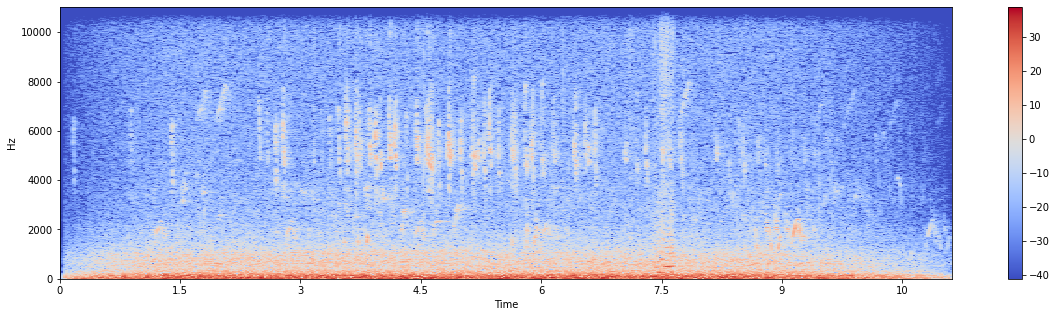

In [ ]:
#short time fourier transform 
X = librosa.stft(audio_data)
# Convert an amplitude spectrogram to Decibels-scaled spectrogram.
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(20, 5))
librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='hz')
plt.colorbar()

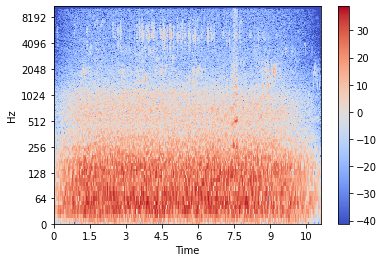

In [ ]:
librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='log')
plt.colorbar()

### RMSE 
Compute root-mean-square (RMS) energy for each frame, either from the audio samples y or from a spectrogram S.

Computing the energy from audio samples is faster as it doesn’t require a STFT calculation. However, using a spectrogram will give a more accurate representation of energy over time because its frames can be windowed, thus prefer using S if it’s already available.

In [ ]:
#short time fourier transform 
X = librosa.stft(audio_data)
# Convert an amplitude spectrogram to Decibels-scaled spectrogram.
S, phase = librosa.magphase(X)
rms = librosa.feature.rms(S=S)



[Text(0.5, 1.0, 'log Power spectrogram')]

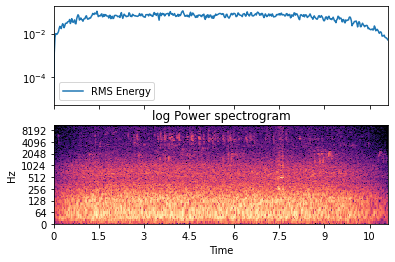

In [ ]:
fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(rms)
ax[0].semilogy(times, rms[0], label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')

A mel spectrogram is a spectrogram where the frequencies are converted to the mel scale.

In [ ]:
audio_data, sampling_rate = librosa.load(file_name)
librosa.feature.melspectrogram(y=audio_data, sr=sampling_rate)


array([[5.5848826e-10, 5.9580849e-03, 5.5228263e-02, ..., 3.6917424e-01,
        5.5180925e-01, 4.0774956e-01],
       [9.3941399e-10, 1.8969707e-02, 6.3110727e-01, ..., 9.4598490e-01,
        5.6297296e-01, 4.7996697e-01],
       [2.7503695e-09, 3.0454759e-02, 9.9657756e-01, ..., 2.0548882e-01,
        5.5312926e-01, 3.2136562e-01],
       ...,
       [1.3008695e-08, 3.1449633e-07, 4.1407793e-06, ..., 7.0820442e-06,
        5.0579574e-06, 2.6636037e-06],
       [3.3548677e-09, 6.2391408e-08, 1.2231086e-06, ..., 1.5949125e-06,
        1.3184376e-06, 6.8674512e-07],
       [2.2217099e-10, 8.8704617e-09, 1.4805531e-07, ..., 1.5272633e-07,
        9.8256677e-08, 4.8134115e-08]], dtype=float32)

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

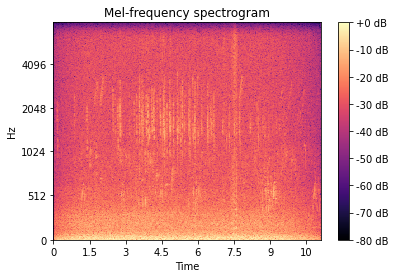

In [ ]:
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sampling_rate,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

zero crossing rate 
The zero-crossing rate (ZCR) is the rate at which a signal changes from positive to zero to negative or from negative to zero to positive.

In [ ]:
librosa.feature.zero_crossing_rate(audio_data)

array([[0.21582031, 0.23828125, 0.24365234, 0.12255859, 0.03417969,
        0.01708984, 0.03808594, 0.03955078, 0.03759766, 0.03662109,
        0.01855469, 0.01855469, 0.01904297, 0.01855469, 0.01855469,
        0.02148438, 0.0234375 , 0.02441406, 0.02050781, 0.01708984,
        0.01660156, 0.01367188, 0.01806641, 0.02099609, 0.02441406,
        0.03173828, 0.02587891, 0.02880859, 0.02734375, 0.02539062,
        0.03271484, 0.02929688, 0.02392578, 0.01953125, 0.01074219,
        0.01171875, 0.01513672, 0.02587891, 0.02929688, 0.03076172,
        0.03320312, 0.02929688, 0.02832031, 0.02294922, 0.02197266,
        0.015625  , 0.01806641, 0.02001953, 0.02148438, 0.02148438,
        0.02099609, 0.02783203, 0.02490234, 0.02783203, 0.03173828,
        0.02539062, 0.02246094, 0.02294922, 0.015625  , 0.02490234,
        0.02587891, 0.02294922, 0.02539062, 0.01708984, 0.01855469,
        0.02099609, 0.02587891, 0.02539062, 0.02978516, 0.02978516,
        0.02734375, 0.02539062, 0.02294922, 0.02

###Separation of Harmonic & Percussive Signals
The goal of harmonic-percussive source separation (HPSS) is to decompose an input audio signal into a signal consisting of all harmonic sounds and a signal consisting of all percussive sounds.

In [ ]:
#Compute the short-time Fourier transform of y
D = librosa.stft(audio_data)
#Decompose D into harmonic and percussive components
#D=Dharmonic+Dpercussive
D_harmonic, D_percussive = librosa.decompose.hpss(D)

Compute full spectrum

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:1642: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  "amplitude_to_db was called on complex input so phase "


Text(0.5, 1.0, 'Full spectrogram')

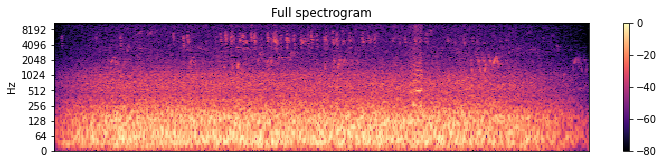

In [ ]:
rp = np.max(np.abs(D))

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=rp), y_axis='log')
plt.colorbar()
plt.title('Full spectrogram')


###compute Harmonic Spectrum 

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:1642: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  "amplitude_to_db was called on complex input so phase "


Text(0.5, 1.0, 'Harmonic spectrogram')

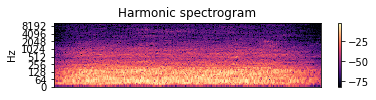

In [ ]:
plt.subplot(3, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(D_harmonic, ref=rp), y_axis='log')
plt.colorbar()
plt.title('Harmonic spectrogram')


###Compute percusive spectrum

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:1642: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  "amplitude_to_db was called on complex input so phase "


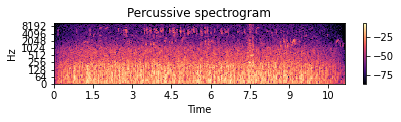

In [ ]:
plt.subplot(3, 1, 3)
librosa.display.specshow(librosa.amplitude_to_db(D_percussive, ref=rp), y_axis='log', x_axis='time')
plt.colorbar()
plt.title('Percussive spectrogram')
plt.tight_layout()

BEAT EXTRACTION

Beats are detected in three stages, following the method of 1:

Measure onset strength

Estimate tempo from onset correlation

Pick peaks in onset strength approximately consistent with estimated tempo

In [ ]:
tempo, beats = librosa.beat.beat_track(y=audio_data, sr=sampling_rate)


In [ ]:
tempo

135.99917763157896

In [ ]:
#Print the frames corresponding to beats
beats

array([  4,  23,  42,  61,  79,  99, 118, 137, 155, 174, 193, 211, 230,
       251, 269, 287, 305, 325, 344, 362])

In [ ]:
#Print them as time frame
librosa.frames_to_time(beats, sr=sampling_rate)

array([0.09287982, 0.53405896, 0.9752381 , 1.41641723, 1.83437642,
       2.29877551, 2.73995465, 3.18113379, 3.59909297, 4.04027211,
       4.48145125, 4.89941043, 5.34058957, 5.82820862, 6.2461678 ,
       6.66412698, 7.08208617, 7.54648526, 7.9876644 , 8.40562358])

In [ ]:
onset_env = librosa.onset.onset_strength(y=audio_data, sr=sampling_rate,
                                         aggregate=np.median)
tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env,
                                       sr=sampling_rate)
print(tempo)
print(beats)

135.99917763157896
[  4  23  42  61  79  99 118 137 155 174 193 211 230 251 269 287 305 325
 344 362]


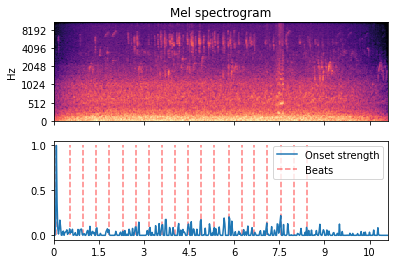

In [ ]:
hop_length = 512
fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(onset_env, sr=sampling_rate, hop_length=hop_length)
M = librosa.feature.melspectrogram(y=audio_data, sr=sampling_rate, hop_length=hop_length)
librosa.display.specshow(librosa.power_to_db(M, ref=np.max),
                         y_axis='mel', x_axis='time', hop_length=hop_length,
                         ax=ax[0])
ax[0].label_outer()
ax[0].set(title='Mel spectrogram')
ax[1].plot(times, librosa.util.normalize(onset_env),
         label='Onset strength')
ax[1].vlines(times[beats], 0, 1, alpha=0.5, color='r',
           linestyle='--', label='Beats')
ax[1].legend()

####Frequency Domain Features

CHROMAGRAM
Chroma features are an interesting and powerful representation for music audio in which the entire spectrum is projected onto 12 bins representing the 12 distinct semitones (or chroma) of the musical octave

In [ ]:
S = np.abs(librosa.stft(audio_data))
chroma = librosa.feature.chroma_stft(S=S, sr=sampling_rate)
chroma

array([[0.8845971 , 0.7384303 , 0.8767423 , ..., 0.8262587 , 0.7670811 ,
        0.82028174],
       [0.9206847 , 0.6201045 , 0.9404745 , ..., 0.80372745, 0.68452674,
        0.77686685],
       [0.87980753, 0.66435724, 0.900795  , ..., 0.626679  , 0.56448555,
        0.60998034],
       ...,
       [0.88291   , 0.8946804 , 0.85562986, ..., 0.68197095, 0.7814253 ,
        1.        ],
       [0.87500167, 0.86250895, 0.87284964, ..., 0.585717  , 0.5545782 ,
        0.64266783],
       [0.8960502 , 0.7906762 , 0.8101434 , ..., 0.64818865, 0.6454195 ,
        0.7923631 ]], dtype=float32)

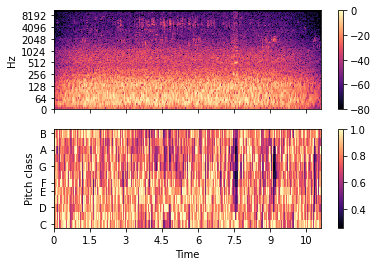

In [ ]:
fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                               y_axis='log', x_axis='time', ax=ax[0])
fig.colorbar(img, ax=[ax[0]])
ax[0].label_outer()
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])

Constant Q-transform
The constant-Q transform transforms a data series to the frequency domain. It is related to the Fourier transform.
In general, the transform is well suited to musical data and proves useful where frequencies span several octaves.It is more useful in the identification of instruments.

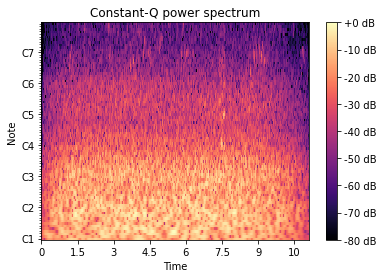

In [ ]:
C = np.abs(librosa.cqt(audio_data, sr=sampling_rate))
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max),
                               sr=sampling_rate, x_axis='time', y_axis='cqt_note', ax=ax)
ax.set_title('Constant-Q power spectrum')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

Chroma Energy distribution Normalized Statistics (CENS)

Another chroma-based feature is chroma energy distribution normalized statistics (CENS) which is typically used to identify similarity between different interpretations of the music given.CENS are typically implemented for audio matching and similarity tas

In [ ]:
#Compare standard cqt chroma to CENS.
chroma_cens = librosa.feature.chroma_cens(y=audio_data, sr=sampling_rate)
chroma_cq = librosa.feature.chroma_cqt(y=audio_data, sr=sampling_rate)

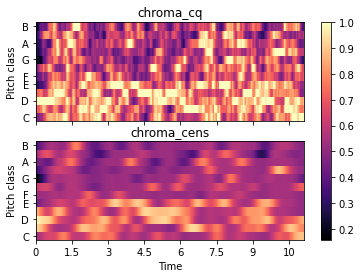

In [ ]:
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
img = librosa.display.specshow(chroma_cq, y_axis='chroma', x_axis='time', ax=ax[0])
ax[0].set(title='chroma_cq')
ax[0].label_outer()
librosa.display.specshow(chroma_cens, y_axis='chroma', x_axis='time', ax=ax[1])
ax[1].set(title='chroma_cens')
fig.colorbar(img, ax=ax)

Spectrum Related Features

SPECTRAL CENTROIDS

The spectral centroid is a measure used in digital signal processing to characterise a spectrum. It indicates where the center of mass of the spectrum is located. Perceptually, it has a robust connection with the impression of brightness of a sound.

In [ ]:
#From spectrogram input:
S, phase = librosa.magphase(librosa.stft(y=audio_data))
cent = librosa.feature.spectral_centroid(S=S)
cent

array([[5236.77084981, 1320.12657937, 1157.62065659, 1048.7241589 ,
        1133.5712119 , 1232.70834982, 1267.42582948, 1871.58025991,
        1639.76102235, 1077.26736161, 1051.00322113, 1101.05160436,
         979.44569435,  876.46627832,  923.27495418, 1096.81745316,
        1008.2878398 ,  929.48132362,  959.9831085 , 1004.74001271,
         905.30496829,  914.53479551,  924.37697729,  832.5361832 ,
        1044.65479377,  985.34348656,  828.17480711, 1000.26389436,
        1062.3975937 ,  979.8744221 ,  998.89331679, 1164.00175423,
        1177.42610407,  894.05556617,  810.51424955,  744.44617115,
         838.93430151, 1130.70438944, 1293.8157616 , 1184.85074288,
        1129.83477826, 1153.46884517, 1154.93490356, 1011.60478734,
         958.55264593, 1006.35976436,  958.71281967,  924.36347416,
        1001.48218977, 1092.64880538, 1103.20820074, 1135.05195597,
        1117.78643263, 1104.31529035, 1031.48060611, 1049.59952436,
         907.4046759 ,  933.37675681,  931.90776

[Text(0.5, 1.0, 'log Power spectrogram')]

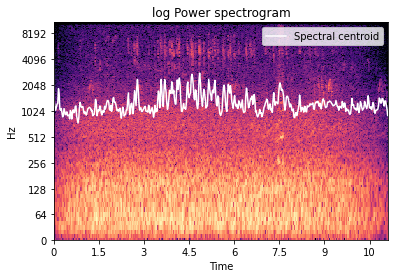

In [ ]:
times = librosa.times_like(cent)
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, cent.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram')


SPECTRAL CONTRAST

Spectral contrast is defined as the decibel dif- ference between peaks and valleys in the spectrum. There are two general motivations behind spectral. contrast enhancement for hearing-impaired (HI) people.

Compute spectral contrast

Each frame of a spectrogram S is divided into sub-bands. For each sub-band, the energy contrast is estimated by comparing the mean energy in the top quantile (peak energy) to that of the bottom quantile (valley energy). High contrast values generally correspond to clear, narrow-band signals, while low contrast values correspond to broad-band noise. 

In [ ]:
S = np.abs(librosa.stft(audio_data))
contrast = librosa.feature.spectral_contrast(S=S, sr=sampling_rate)


[Text(0, 0.5, 'Frequency bands'), Text(0.5, 1.0, 'Spectral contrast')]

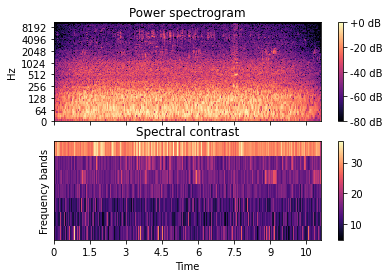

In [ ]:
fig, ax = plt.subplots(nrows=2, sharex=True)
img1 = librosa.display.specshow(librosa.amplitude_to_db(S,
                                                 ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[0])
fig.colorbar(img1, ax=[ax[0]], format='%+2.0f dB')
ax[0].set(title='Power spectrogram')
ax[0].label_outer()
img2 = librosa.display.specshow(contrast, x_axis='time', ax=ax[1])
fig.colorbar(img2, ax=[ax[1]])
ax[1].set(ylabel='Frequency bands', title='Spectral contrast')
                      

SPECTRAL ROLLOFF
Spectral rolloff is the frequency below which a specified percentage of the total spectral energy, e.g. 85%, lies. librosa.feature.spectral_rolloff computes the rolloff frequency for each frame in a signal: spectral_rolloff = librosa.

Compute roll-off frequency.

The roll-off frequency is defined for each frame as the center frequency for a spectrogram bin such that at least roll_percent (0.85 by default) of the energy of the spectrum in this frame is contained in this bin and the bins below. This can be used to, e.g., approximate the maximum (or minimum) frequency by setting roll_percent to a value close to 1 (or 0).

In [ ]:
# Approximate maximum frequencies with roll_percent=0.99
rolloff = librosa.feature.spectral_rolloff(y=audio_data, sr=sampling_rate, roll_percent=0.95)
rolloff

array([[9969.87304688, 6998.29101562, 6642.99316406, 6330.76171875,
        6696.82617188, 7009.05761719, 6492.26074219, 6492.26074219,
        6438.42773438, 6319.99511719, 6427.66113281, 6750.65917969,
        6158.49609375, 5900.09765625, 5996.99707031, 6610.69335938,
        6244.62890625, 5889.33105469, 5986.23046875, 6406.12792969,
        5813.96484375, 5792.43164062, 5857.03125   , 5297.16796875,
        6492.26074219, 6136.96289062, 5340.234375  , 6190.79589844,
        6395.36132812, 5932.39746094, 6319.99511719, 6858.32519531,
        6933.69140625, 5630.93261719, 5307.93457031, 4952.63671875,
        5404.83398438, 6567.62695312, 6772.19238281, 6642.99316406,
        6632.2265625 , 6718.359375  , 6718.359375  , 6223.09570312,
        5749.36523438, 5996.99707031, 5921.63085938, 5566.33300781,
        5932.39746094, 6513.79394531, 6395.36132812, 6007.76367188,
        5878.56445312, 6147.72949219, 6104.66308594, 6007.76367188,
        5501.73339844, 5652.46582031, 5824.73144

In [ ]:
# Approximate minimum frequencies with roll_percent=0.01
rolloff_min = librosa.feature.spectral_rolloff(y=audio_data, sr=sampling_rate, roll_percent=0.05)
rolloff

array([[9969.87304688, 6998.29101562, 6642.99316406, 6330.76171875,
        6696.82617188, 7009.05761719, 6492.26074219, 6492.26074219,
        6438.42773438, 6319.99511719, 6427.66113281, 6750.65917969,
        6158.49609375, 5900.09765625, 5996.99707031, 6610.69335938,
        6244.62890625, 5889.33105469, 5986.23046875, 6406.12792969,
        5813.96484375, 5792.43164062, 5857.03125   , 5297.16796875,
        6492.26074219, 6136.96289062, 5340.234375  , 6190.79589844,
        6395.36132812, 5932.39746094, 6319.99511719, 6858.32519531,
        6933.69140625, 5630.93261719, 5307.93457031, 4952.63671875,
        5404.83398438, 6567.62695312, 6772.19238281, 6642.99316406,
        6632.2265625 , 6718.359375  , 6718.359375  , 6223.09570312,
        5749.36523438, 5996.99707031, 5921.63085938, 5566.33300781,
        5932.39746094, 6513.79394531, 6395.36132812, 6007.76367188,
        5878.56445312, 6147.72949219, 6104.66308594, 6007.76367188,
        5501.73339844, 5652.46582031, 5824.73144

[Text(0.5, 1.0, 'log Power spectrogram')]

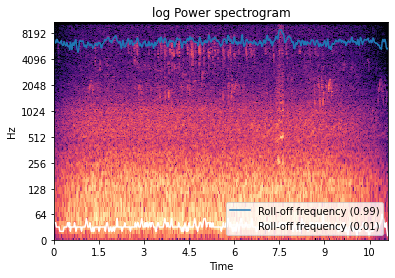

In [ ]:
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(librosa.times_like(rolloff), rolloff[0], label='Roll-off frequency (0.99)')
ax.plot(librosa.times_like(rolloff), rolloff_min[0], color='w',
        label='Roll-off frequency (0.01)')
ax.legend(loc='lower right')
ax.set(title='log Power spectrogram')

In [ ]:
mfccs = librosa.feature.mfcc(y=audio_data, sr=sampling_rate, n_mfcc=40)

[Text(0.5, 1.0, 'MFCC')]

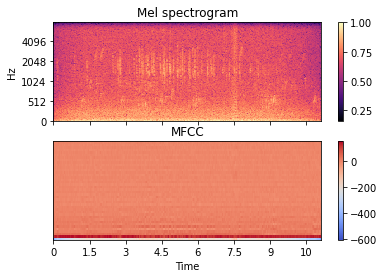

In [ ]:
fig, ax = plt.subplots(nrows=2, sharex=True)
mg = librosa.display.specshow(librosa.power_to_db(S, ref=np.max),
                               x_axis='time', y_axis='mel', fmax=8000,
                               ax=ax[0])
fig.colorbar(img, ax=[ax[0]])
ax[0].set(title='Mel spectrogram')
ax[0].label_outer()
img = librosa.display.specshow(mfccs, x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])
ax[1].set(title='MFCC')

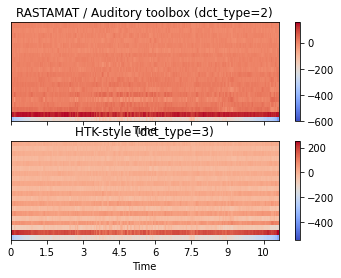

In [ ]:
m_slaney = librosa.feature.mfcc(y=audio_data, sr=sampling_rate, dct_type=2)
m_htk = librosa.feature.mfcc(y=audio_data, sr=sampling_rate, dct_type=3)
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
img1 = librosa.display.specshow(m_slaney, x_axis='time', ax=ax[0])
ax[0].set(title='RASTAMAT / Auditory toolbox (dct_type=2)')
fig.colorbar(img, ax=[ax[0]])
img2 = librosa.display.specshow(m_htk, x_axis='time', ax=ax[1])
ax[1].set(title='HTK-style (dct_type=3)')
fig.colorbar(img2, ax=[ax[1]])

###Mel-frequency cepstral coefficients

n sound processing, the mel-frequency cepstrum (MFC) is a representation of the short-term power spectrum of a sound, based on a linear cosine transform of a log power spectrum on a nonlinear mel scale of frequency.

Mel-frequency cepstral coefficients (MFCCs) are coefficients that collectively make up an MFC. They are derived from a type of cepstral representation of the audio clip (a nonlinear "spectrum-of-a-spectrum"). The difference between the cepstrum and the mel-frequency cepstrum is that in the MFC, the frequency bands are equally spaced on the mel scale, which approximates the human auditory system's response more closely than the linearly-spaced frequency bands used in the normal spectrum. This frequency warping can allow for better representation of sound, for example, in audio compression.

In [ ]:
from librosa import feature 
def extract_features(signal):
   return [
        librosa.feature.zero_crossing_rate(signal)[0, 0],
        librosa.feature.spectral_centroid(signal)[0, 0],
        librosa.feature.spectral_rolloff(signal)[0,0],
        librosa.feature.mfcc(signal)[0,0]
        librosa.feature.chroma_sfft(signal)[0,0]
   ]